# Systems Immunogenetics Project

## WNV Cleaning Steps

### McWeeney Lab, Oregon Health & Science University

** Authors: Gabrielle Choonoo (choonoo@ohsu.edu) and Michael Mooney (mooneymi@ohsu.edu) **

## Introduction

This is the step-by-step process for cleaning the WNV data (weight, clinical score, qpcr, and phenotypes).

Required Files:
* WNV Data
* WNV Data Dictionary
* Array Annotation
* This notebook (notebook.ipynb): [[Download here]](https://raw.githubusercontent.com/gchoonoo/Buxco_notebook/master/notebook.ipynb)

Required R packages:
- `gdata`

**Note: this notebook can also be downloaded as an R script (only the code blocks seen below will be included): [[Download R script here]](https://raw.githubusercontent.com/gchoonoo/WNV_cleaning_scripts/master/clean_data.r)

** All code is available on GitHub: [https://github.com/gchoonoo/WNV_cleaning_scripts](https://github.com/gchoonoo/WNV_cleaning_scripts) **

# Weight sheets: Read in Data

In [1]:
library(gdata)

# Gale: Read in weight sheet
# Lund: Read in all weight sheets and combine
# Lund Data Example:

# Set empty vector
data2 <- vector("list",length(dir("data")))

# Read in all new data and combine
for(i in 1:length(dir("data"))){
  #print(i)
  read.xls(xls=paste("data",dir("data")[i],sep="/"), sheet=1, skip=2,colClasses=c("NULL",rep(NA,37)), stringsAsFactors=F) -> data2[[i]]
  
  days = gsub("d","D",gsub("\\.","",names(data2[[i]])[9:37]))
  
  names(data2[[i]]) <- c("UW_Line","ID","Mating","RIX_ID","Timepoint","Date_Infected","Death_Euthanized","Death_FoundInCage",days)
  
  data2[[i]][1:which(data2[[i]][,1] == "% of initial weight")-1,] -> data2[[i]]
  
  new_lund_line = do.call(rbind,data2)      
}

if(length(unique(new_lund_line[,1])) == length(dir("data"))){
  print(paste("Read in", length(dir("data")),"files"))
}

# Cleaning steps as outlined by Readme

# Cleaning Blanks to NA function
clean_na = function(data_set){
  
  for (i in 1:dim(data_set)[2]){
    #print(i)
    if(sum(na.omit(data_set[,i] == "") > 0)){
      
      data_set[which( data_set[,i] == ""),i] <- NA
    }
    
  }
  return(data_set)
}

clean_na(new_lund_line) -> new_lund_line

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size



[1] "Read in 13 files"


# 1. Clean mating: "X" changed to "x"

In [2]:
new_lund_line[,"Mating"] <- gsub("X","x",new_lund_line[,"Mating"])

# Check if all matings have unique uw line, if not returns lines that has duplicated mating
unique(new_lund_line[,"UW_Line"])[sapply(1:length(unique(new_lund_line[,"UW_Line"])), function(xx)length(unique(new_lund_line[as.vector(unlist(sapply(unique(new_lund_line[,"UW_Line"])[xx],function(x)which(x==new_lund_line[,"UW_Line"])))),"Mating"]))) > 1]

# Clean mating if necessary: see Gale and Lund specific cleaning steps in Read me

character(0)

# 2. Clean ID with new mating: Mating + RIX_ID

In [3]:
new_lund_line[,"ID"] <- paste(new_lund_line[,"Mating"],new_lund_line[,"RIX_ID"],sep="_")

# 3. Add/remove columns and edit column names

In [4]:
# 3. Add/remove columns and edit column names: Add Lab, Data_Altered
  # Gale: Add Death_FoundInCage column
  # Change column name "Died_of_virus_at_day" to "Died_of_Virus" 
  # Change column name "Animal_was_euthansized_at_day" to "Death_Euthanized"
  # Change column name "Died_from_anesthesia" to "Died_from_Anesthesia"
  # Remove columns: CV1, CV2, Interesting_Phenotype (empty)
# Lund: Add UWID, Cohort, Sex, Died_of_Virus, Died_from_Anesthesia, and Notes columns
new_lund_line$Lab = "Lund" 
new_lund_line$UWID = NA
new_lund_line$Cohort = NA
new_lund_line$Sex = NA
new_lund_line$Died_of_Virus = NA
new_lund_line$Died_from_Anesthesia = NA
new_lund_line$Data_Altered = NA
new_lund_line$Notes = NA

# 4. Check the Virus column is annotated and clean timepoint

In [5]:
unique(new_lund_line$Virus)

# add virus column
new_lund_line$Virus = NA
new_lund_line[grep("m",new_lund_line[,"Timepoint"]),"Virus"] <- "Mock"
new_lund_line[-grep("m",new_lund_line[,"Timepoint"]),"Virus"] <- "WNV"

# clean timepoint
new_lund_line[,"Timepoint"] <- as.numeric(as.character(gsub("d","",gsub("m","",new_lund_line[,"Timepoint"]))))

NULL

# 5. Check for any duplicated or NA rows

In [6]:
days = c("D0","D1","D2","D3","D4","D5","D6","D7","D8","D9","D10","D11","D12","D13","D14","D15","D16","D17","D18","D19","D20","D21","D22","D23","D24","D25","D26","D27","D28")
na_now = sapply(1:dim(new_lund_line)[1],function(x)sum(is.na(new_lund_line[x,days])) == length(new_lund_line[x,days]))

sum(na_now)

new_lund_line[na_now,] # Flag if no died early notes

[1] 3

,UW_Line,ID,Mating,RIX_ID,Timepoint,Date_Infected,Death_Euthanized,Death_FoundInCage,D0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,Lab,UWID,Cohort,Sex,Died_of_Virus,Died_from_Anesthesia,Data_Altered,Notes,Virus
16,061,8056x8033_NA,8056x8033,NA,28,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Lund,NA,NA,NA,NA,NA,NA,NA,Mock
17,061,8056x8033_NA,8056x8033,NA,28,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Lund,NA,NA,NA,NA,NA,NA,NA,Mock
18,061,8056x8033_NA,8056x8033,NA,28,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Lund,NA,NA,NA,NA,NA,NA,NA,Mock


# 6. Annotate Death_Date based on date of infection to timepoint or died early notes, annotate putative death day

In [19]:
# Lund: Change Death_Euthanized and Death_FoundInCage to day instead of date
new_lund_line[,"Death_Euthanized"] <- as.Date(new_lund_line[,"Death_Euthanized"], format="%m/%d/%y",origin="1900-01-01")
new_lund_line[,"Death_FoundInCage"] <- as.Date(new_lund_line[,"Death_FoundInCage"], format="%m/%d/%y",origin="1900-01-01")
new_lund_line[,"Date_Infected"] <- as.Date(new_lund_line[,"Date_Infected"], format="%m/%d/%y",origin="1900-01-01")
new_lund_line[,"Death_FoundInCage"] <- as.vector(difftime(new_lund_line[,"Death_FoundInCage"],new_lund_line[,"Date_Infected"],units="days"))
new_lund_line[,"Death_Euthanized"] <- as.vector(difftime(new_lund_line[,"Death_Euthanized"],new_lund_line[,"Date_Infected"],units="days"))

# Annotate death date
new_lund_line$Death_Date = NA
new_lund_line[which(is.na(new_lund_line[,"Date_Infected"])),"UW_Line"]
new_lund_line[which(!is.na(new_lund_line[,"Death_Euthanized"])),"Death_Date"] <- as.character(new_lund_line[which(!is.na(new_lund_line[,"Death_Euthanized"])),"Date_Infected"]+new_lund_line[which(!is.na(new_lund_line[,"Death_Euthanized"])),"Death_Euthanized"])
new_lund_line[which(!is.na(new_lund_line[,"Death_FoundInCage"])),"Death_Date"] <- as.character(new_lund_line[which(!is.na(new_lund_line[,"Death_FoundInCage"])),"Date_Infected"]+new_lund_line[which(!is.na(new_lund_line[,"Death_FoundInCage"])),"Death_FoundInCage"])
new_lund_line[which(is.na(new_lund_line[,"Death_FoundInCage"]) & is.na(new_lund_line[,"Death_Euthanized"])),"Death_Date"] <- as.character(new_lund_line[which(is.na(new_lund_line[,"Death_FoundInCage"]) & is.na(new_lund_line[,"Death_Euthanized"])),"Date_Infected"]+new_lund_line[which(is.na(new_lund_line[,"Death_FoundInCage"]) & is.na(new_lund_line[,"Death_Euthanized"])),"Timepoint"])

# annotate putative death day
new_lund_line$putative_death_day <- sapply(1:dim(new_lund_line)[1],function(x){
  #print(x)
  if(length(as.numeric(as.character(gsub("D","",names(new_lund_line[x,days][which(!is.na(new_lund_line[x,days]))]))))) ==0){
    NA
  }else{
  max(as.numeric(as.character(gsub("D","",names(new_lund_line[x,days][which(!is.na(new_lund_line[x,days]))])))))
  }
})

# Check if any still NA, annotate death date as date of infection to timepoint if the difference between the timepoint and putative death day is <= 3, otherwise this is flagged below
new_lund_line[which(is.na(new_lund_line[,"Death_Date"])),]

[1] "061" "061" "061"

,UW_Line,ID,Mating,RIX_ID,Timepoint,Date_Infected,Death_Euthanized,Death_FoundInCage,D0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,Lab,UWID,Cohort,Sex,Died_of_Virus,Died_from_Anesthesia,Data_Altered,Notes,Virus,Death_Date,putative_death_day,D0_Percentage,D1_Percentage,D2_Percentage,D3_Percentage,D4_Percentage,D5_Percentage,D6_Percentage,D7_Percentage,D8_Percentage,D9_Percentage,D10_Percentage,D11_Percentage,D12_Percentage,D13_Percentage,D14_Percentage,D15_Percentage,D16_Percentage,D17_Percentage,D18_Percentage,D19_Percentage,D20_Percentage,D21_Percentage,D22_Percentage,D23_Percentage,D24_Percentage,D25_Percentage,D26_Percentage,D27_Percentage,D28_Percentage,Flag_Weight_Drop,Flag_Identical_Weights,Flag_Per_Day_Weight_Change,Flag_Death_Day,Death_Date_greater_timepoint
16,061,8056x8033_NA,8056x8033,NA,28,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Lund,NA,NA,NA,NA,NA,NA,NA,Mock,NA,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,FALSE
17,061,8056x8033_NA,8056x8033,NA,28,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Lund,NA,NA,NA,NA,NA,NA,NA,Mock,NA,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,FALSE
18,061,8056x8033_NA,8056x8033,NA,28,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Lund,NA,NA,NA,NA,NA,NA,NA,Mock,NA,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,FALSE


# 7. Calculate weight change percentages, add D0_Percentage column and set to baseline 0

In [20]:
# add weight percentage columns
ncol(new_lund_line) -> ncols
new_lund_line[,(ncols+1):(ncols+29)] <- NA
names(new_lund_line)[(ncols+1):(ncols+29)] <- paste(days, "Percentage",sep="_")

# Make sure D0_Percentage column exists and is set to baseline = 0
new_lund_line[,"D0_Percentage"] <- 0

# change weights to numeric
for(i in days){
  #print(i)
  new_lund_line[,i] <- as.numeric(as.character(new_lund_line[,i]))
}

# calculate percentages
for(i in days[-1]){
  #print(i)
  d2_p = sapply(1:dim(new_lund_line)[1],function(x){
    #print(x)
    (diff(c(new_lund_line[x,"D0"], new_lund_line[x,i]))/new_lund_line[x,"D0"])*100
  })
  
  new_lund_line[,paste0(i,"_Percentage")] <- d2_p
}

# 8. Add Flag_Weight_Drop column 

In [21]:
# Flag = True if animals lost more than 20% body weight
days_percent = paste0(days,"_Percentage")

flag_weight_drop = sapply(1:dim(new_lund_line)[1],function(x)sum(new_lund_line[x,days_percent] <= -20, na.rm=T) > 0)

new_lund_line$Flag_Weight_Drop = flag_weight_drop

# 9. Add Flag_Identical_Weights 

In [22]:
# Flag = True if identical weights on consecutive measurements
identical_weights = sapply(1:dim(new_lund_line)[1],function(x)suppressWarnings(sum(diff(na.omit(as.numeric(as.character(new_lund_line[x,days_percent])))) == 0) > 0))

new_lund_line$Flag_Identical_Weights = identical_weights

# 10. Add Flag_Per_Day_Weight_Change 

In [23]:
# Flag = True if weight change > 10% on consecutive measurements
weight_change_flag = sapply(1:dim(new_lund_line)[1],function(x)suppressWarnings(sum(abs(diff(na.omit(as.numeric(as.character(new_lund_line[x,days_percent]))))) >= 10) > 0))

new_lund_line$Flag_Per_Day_Weight_Change = weight_change_flag

# 11. Add Flag_weight_day 

In [24]:
# Flag = True where Timepoint is >= 3 more than putative death day (day the weights are recorded up to) (internal check)
new_lund_line$Flag_Death_Day = NA

if(length(which(new_lund_line[,"Timepoint"] - new_lund_line[,"putative_death_day"]>=3 & is.na(new_lund_line[,"Death_Euthanized"]) & is.na(new_lund_line[,"Death_FoundInCage"]))) == 0){
  new_lund_line$Flag_Death_Day = FALSE
}else{
  new_lund_line[which(new_lund_line[,"Timepoint"] - new_lund_line[,"putative_death_day"]>=3 & is.na(new_lund_line[,"Death_Euthanized"]) & is.na(new_lund_line[,"Death_FoundInCage"])),"Flag_Death_Day"] <- TRUE
  
  new_lund_line[-which(new_lund_line[,"Timepoint"] - new_lund_line[,"putative_death_day"]>=3 & is.na(new_lund_line[,"Death_Euthanized"]) & is.na(new_lund_line[,"Death_FoundInCage"])),"Flag_Death_Day"] <- FALSE
}

# 12. Add Flag_weight_date 

In [25]:
# Flag = True where death day > timepoint (internal check)
new_lund_line$Death_Date_greater_timepoint = NA

if(length(which(new_lund_line[,"Death_Euthanized"] > new_lund_line[,"Timepoint"] | new_lund_line[,"Death_FoundInCage"] > new_lund_line[,"Timepoint"] | new_lund_line[,"Died_of_Virus"] > new_lund_line[,"Timepoint"] | new_lund_line[,"Died_from_Anesthesia"] > new_lund_line[,"Timepoint"])) >0){
  
  new_lund_line[which(new_lund_line[,"Death_Euthanized"] > new_lund_line[,"Timepoint"] | new_lund_line[,"Death_FoundInCage"] > new_lund_line[,"Timepoint"] | new_lund_line[,"Died_of_Virus"] > new_lund_line[,"Timepoint"] | new_lund_line[,"Died_from_Anesthesia"] > new_lund_line[,"Timepoint"]),"Death_Date_greater_timepoint"] <- TRUE
  
  new_lund_line[-which(new_lund_line[,"Death_Euthanized"] > new_lund_line[,"Timepoint"] | new_lund_line[,"Death_FoundInCage"] > new_lund_line[,"Timepoint"] | new_lund_line[,"Died_of_Virus"] > new_lund_line[,"Timepoint"] | new_lund_line[,"Died_from_Anesthesia"] > new_lund_line[,"Timepoint"]),"Death_Date_greater_timepoint"] <- FALSE
  
}else{
  new_lund_line$Death_Date_greater_timepoint = FALSE
}

# 13. Order columns according to the data dictionary

In [26]:
# Read in data dictionary
mycols <- rep("NULL", 4)
mycols[1] <- NA

read.xls(xls="WNV_Data_Dictionary.xlsx", sheet="Weight Data", colClasses=mycols, stringsAsFactors=F) -> data_dict

# internal cols
internal_cols = c("putative_death_day","Flag_Death_Day", "Death_Date_greater_timepoint")
internal_cols_v2 = which(names(new_lund_line) %in% internal_cols)

# order columns by data dictionary and add internal column at the end
new_lund_line[,c(as.vector(unlist(sapply(data_dict[,1],function(x)which(x==names(new_lund_line))))),internal_cols_v2)] -> new_lund_line_v2

# 14. Annotate array_exists column

In [27]:
# Read in expression annotation
read.table(file="all_expression_ids.txt") -> exp_id

new_lund_line_v2$array_exists = NA

if(length(as.vector(unlist(sapply(as.character(exp_id[,1]),function(x)which(x==as.character(new_lund_line_v2[,1])))))) >0){
  new_lund_line_v2[as.vector(unlist(sapply(as.character(exp_id[,1]),function(x)which(x==as.character(new_lund_line_v2[,1]))))),"array_exists"] <- "Yes"
  
  new_lund_line_v2[-as.vector(unlist(sapply(as.character(exp_id[,1]),function(x)which(x==as.character(new_lund_line_v2[,1]))))),"array_exists"] <- "No"
}else{
  new_lund_line_v2$array_exists = "No"
}
                                            
# Lund: Remove beginning 0 in UW_Line
new_lund_line_v2[which(substring(new_lund_line_v2[,"UW_Line"],1,1) == "0"),"UW_Line"] <- substring(new_lund_line_v2[which(substring(new_lund_line_v2[,"UW_Line"],1,1) == "0"),"UW_Line"],2,nchar(new_lund_line_v2[which(substring(new_lund_line_v2[,"UW_Line"],1,1) == "0"),"UW_Line"]))


# 15. Update Data: Add flags_checked column

In [28]:
# Gale: Cumulative data, make sure old lines are the same. Set flag for old ID's that they have already been verified
# Lund: Need to read in old data and update any overlapping lines and add the new lines. Set flag for old ID's that have already been verified
# read in full data
read.xls(xls="Lund_Weight_22-Mar-2016_final.xlsx", sheet=1, stringsAsFactors=F) -> lund_weight_full

# remove any lines from full that are in updated data
remove_lines = intersect(new_lund_line_v2[,"UW_Line"], lund_weight_full[,"UW_Line"])

# update line 45
length(remove_lines) == 0

lund_weight_full[-which(lund_weight_full[,"UW_Line"] == 45),] -> lund_weight_full

lund_weight_full$flags_checked = TRUE

new_lund_line_v2$flags_checked = FALSE

# clean date format
lund_weight_full[,"Death_Date"] <- as.character(lund_weight_full[,"Death_Date"])
lund_weight_full[,"Date_Infected"] <- as.Date(lund_weight_full[,"Date_Infected"],format="%Y-%m-%d",origin="1900-01-01")

new_lund_line_v2[,"Death_Date"] <- as.character(new_lund_line_v2[,"Death_Date"])
new_lund_line_v2[,"Date_Infected"] <- as.Date(as.character(new_lund_line_v2[,"Date_Infected"]),format="%Y-%m-%d",origin="1900-01-01")

# Merge new data and old data
merge(lund_weight_full, new_lund_line_v2, by=intersect(names(new_lund_line_v2),names(lund_weight_full)), all=T) -> lund_weight_full_v2

# update flags checked
lund_weight_full_v2[which(lund_weight_full_v2[,"Data_Altered"] == "Yes"),"flags_checked"] <- TRUE
lund_weight_full_v2[which(lund_weight_full_v2[,"Notes"] == "Not receiving, line complete"),"flags_checked"] <- TRUE
lund_weight_full_v2[which(lund_weight_full_v2[,"flags_checked"]),c("putative_death_day")] <- lund_weight_full_v2[which(lund_weight_full_v2[,"flags_checked"]),c("Timepoint")]
lund_weight_full_v2[which(lund_weight_full_v2[,"flags_checked"]),c("Flag_Death_Day")] <- FALSE
lund_weight_full_v2[which(lund_weight_full_v2[,"flags_checked"]),c("Death_Date_greater_timepoint")] <- FALSE

# Save cleaned file
write.table(file="./Lund_Weight_cleaned.txt", x=lund_weight_full_v2, sep="\t", quote=F, row.names=F, na="")

[1] FALSE

# 16. Make specific alterations listed in the Readme. 

In [ ]:
# Make any manual corrections needed
# Note if you change weights, need to also re-calculate weight percentages. Record these changes in Data_Altered and Notes column

# Example Plot

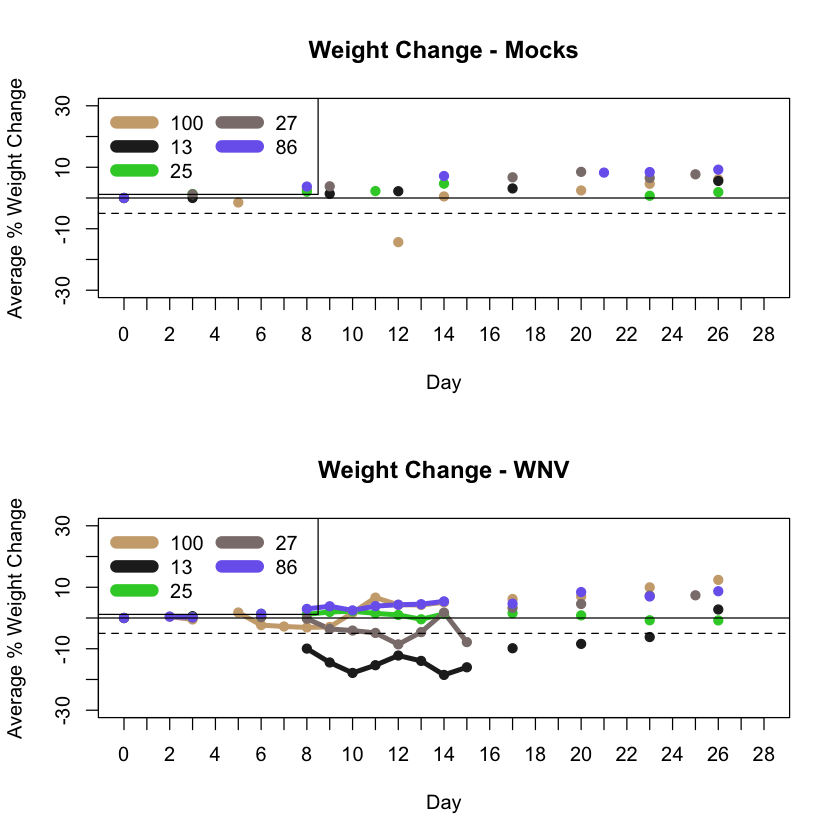

In [29]:
weight_time_plot = function(uw_lines, weight_cols=days_percent, Mocks=FALSE, ...) {
  
  y_weights = aggregate(lund_weight_full_v2[, weight_cols], list(lund_weight_full_v2$UW_Line, lund_weight_full_v2$Virus), mean, na.rm=T)
  colnames(y_weights) = c('line','virus',weight_cols)
  n_cols = floor(length(uw_lines)/3) + ceiling((length(uw_lines)%%3)/3)
  xvals = c(0:28)
  
  if (Mocks) {
    par(mfrow=c(2,1))
    matplot(xvals, t(y_weights[y_weights[,1] %in% uw_lines & y_weights$virus=='Mock',weight_cols]), type="l", ylim=c(-30,30), ylab="Average % Weight Change", xlab="Day", main="Weight Change - Mocks", lty=1, lwd=4,xaxt='n',...)
    
    matplot(xvals, t(y_weights[y_weights[,1] %in% uw_lines & y_weights$virus=='Mock',weight_cols]), type="p", pch=19, ylim=c(-30,30), ylab="Average % Weight Change", xlab="Day", main="Weight Change - Mocks", add=T,xaxt='n',...)
    
    axis(side=1,at=xvals, labels=c(0:28))
    
    abline(h=0, col='black')
    abline(h=-5, col='black', lty=2)
    legend('topleft', legend=y_weights$line[y_weights$line %in% uw_lines & y_weights$virus=='WNV'], lty=1, lwd=10, ncol=n_cols,...)
    
    matplot(xvals, t(y_weights[y_weights[,1] %in% uw_lines & y_weights$virus=='WNV',weight_cols]), type="l", ylim=c(-30,30), ylab="Average % Weight Change", xlab="Day", main="Weight Change - WNV", lty=1, lwd=4,xaxt='n',...)
    matplot(xvals, t(y_weights[y_weights[,1] %in% uw_lines & y_weights$virus=='WNV',weight_cols]), type="p", pch=19, ylim=c(-30,30), ylab="Average % Weight Change", xlab="Day", main="Weight Change - WNV", add=T,xaxt='n',...)
    axis(side=1,at=xvals, labels=c(0:28))
    abline(h=0, col='black')
    abline(h=-5, col='black', lty=2)
    
    legend('topleft', legend=y_weights$line[y_weights$line %in% uw_lines & y_weights$virus=='WNV'], lty=1, lwd=10, ncol=n_cols,...)
  } else {
    matplot(xvals, t(y_weights[y_weights[,1] %in% uw_lines & y_weights$virus=='WNV',weight_cols]), type="l", ylim=c(-30,30), ylab="Average % Weight Change", xlab="Day", main="Weight Change - WNV", lty=1, lwd=4,xaxt='n', ...)
    matplot(xvals, t(y_weights[y_weights[,1] %in% uw_lines & y_weights$virus=='WNV',weight_cols]), type="p", pch=19, ylim=c(-30,30), ylab="Average % Weight Change", xlab="Day", main="Weight Change - WNV", add=T,xaxt='n', ...)
    axis(side=1,at=xvals, labels=c(0:32,45))
    abline(h=0, col='black')
    abline(h=-5, col='black', lty=2)
    legend('topleft', legend=y_weights$line[y_weights$line %in% uw_lines & y_weights$virus=='WNV'], lty=1, lwd=10, ncol=n_cols, ...)
  }
}

weight_time_plot(uw_lines=c("25","27","100","86","13"), weight_cols=days_percent,Mocks=T, col=sample(colors(),5))
